In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.stats as stats
import xgboost as xgb

In [4]:
file_path = "raw_data/Dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [5]:
df.shape

(1552210, 44)

In [6]:
df.Patient_ID.value_counts()

Patient_ID
18469     336
113190    336
4905      336
101922    336
116439    336
         ... 
115587      8
116503      8
111396      8
10209       8
114977      8
Name: count, Length: 40336, dtype: int64

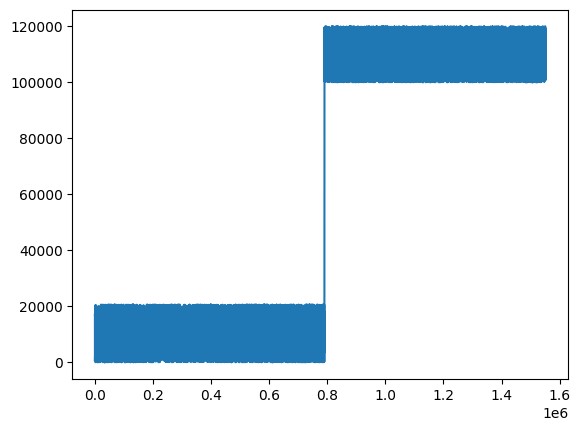

In [7]:
plt.plot(df.Patient_ID)

In [8]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Bilirubin_direct    0.998074
Fibrinogen          0.993402
TroponinI           0.990477
Bilirubin_total     0.985092
Alkalinephos        0.983932
AST                 0.983776
Lactate             0.973299
PTT                 0.970559
SaO2                0.965494
EtCO2               0.962868
Phosphate           0.959863
HCO3                0.958106
Chloride            0.954603
BaseExcess          0.945790
PaCO2               0.944401
Calcium             0.941161
Platelets           0.940595
Creatinine          0.939044
Magnesium           0.936896
WBC                 0.935932
BUN                 0.931344
pH                  0.930697
Hgb                 0.926176
FiO2                0.916658
Hct                 0.911460
Potassium           0.906891
Glucose             0.828943
Temp                0.661627
Unit2               0.394251
Unit1               0.394251
DBP                 0.313459
Resp                0.153546
SBP                 0.145770
O2Sat               0.130611
MAP           

In [9]:
features = df.columns.tolist()
features

['Unnamed: 0',
 'Hour',
 'HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'EtCO2',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Chloride',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'Hct',
 'Hgb',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel',
 'Patient_ID']

In [10]:
#features to drop in the dataset

columns_drop = ['Unnamed: 0','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
  'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2']

columns_for_baseline = ['Hour', 'HR','O2Sat', 'Temp','SBP', 'MAP', 'DBP', 'Resp', 'EtCO2','Age','Gender','Patient_ID','SepsisLabel']

In [11]:
df1 = df[columns_for_baseline]
df1.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,17072,0
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,68.54,0,17072,0
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,68.54,0,17072,0
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,68.54,0,17072,0
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,68.54,0,17072,0


In [12]:
df_filled = df1.bfill().ffill()
df1.head(50)

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,17072,0
1,1,65.0,100.0,NaN,NaN,72.00,NaN,16.5,NaN,68.54,0,17072,0
2,2,78.0,100.0,NaN,NaN,42.50,NaN,NaN,NaN,68.54,0,17072,0
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,68.54,0,17072,0
4,4,70.0,100.0,NaN,129.0,74.00,69.0,14.0,NaN,68.54,0,17072,0
5,5,62.0,100.0,NaN,124.0,85.00,61.0,14.0,NaN,68.54,0,17072,0
6,6,61.0,100.0,NaN,101.0,75.00,58.0,14.0,NaN,68.54,0,17072,0
7,7,68.0,100.0,35.78,142.0,93.50,78.0,16.0,NaN,68.54,0,17072,0
8,8,71.0,100.0,NaN,121.0,74.00,91.0,14.0,NaN,68.54,0,17072,0
9,9,69.0,100.0,NaN,120.0,79.00,98.0,14.0,NaN,68.54,0,17072,0


In [13]:
(df_filled.isnull().sum()/len(df_filled)).sort_values(ascending=False)

Hour           0.0
HR             0.0
O2Sat          0.0
Temp           0.0
SBP            0.0
MAP            0.0
DBP            0.0
Resp           0.0
EtCO2          0.0
Age            0.0
Gender         0.0
Patient_ID     0.0
SepsisLabel    0.0
dtype: float64

In [15]:
df_encoded = df_filled

In [16]:
(df_encoded['SepsisLabel'].value_counts()/len(df_encoded)).sort_values(ascending=False)

SepsisLabel
0    0.982015
1    0.017985
Name: count, dtype: float64

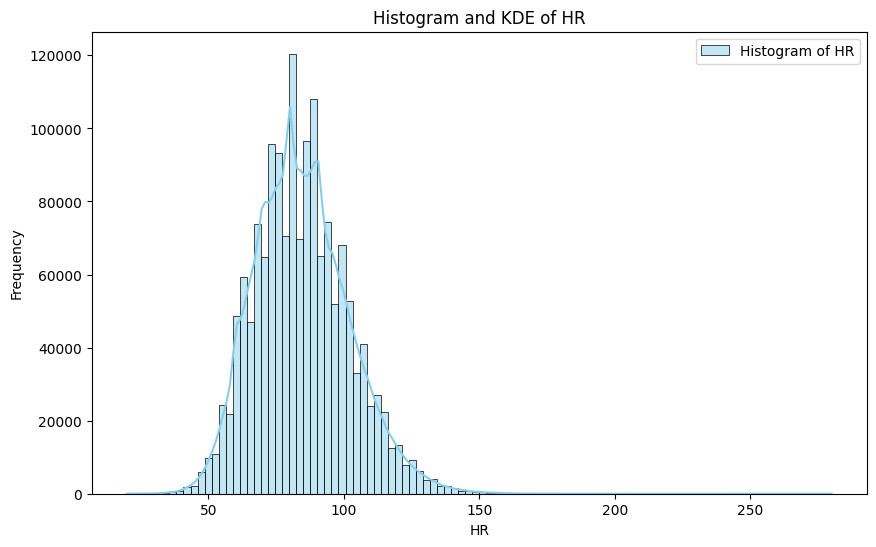

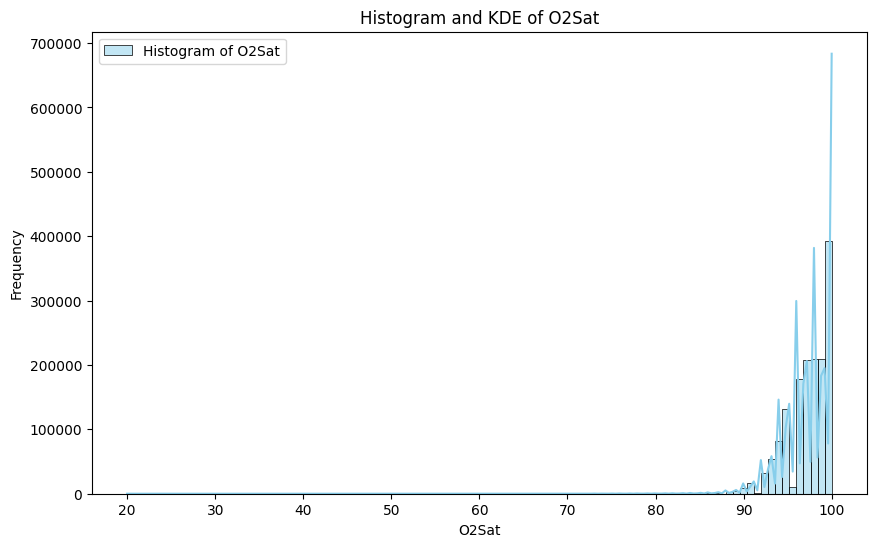

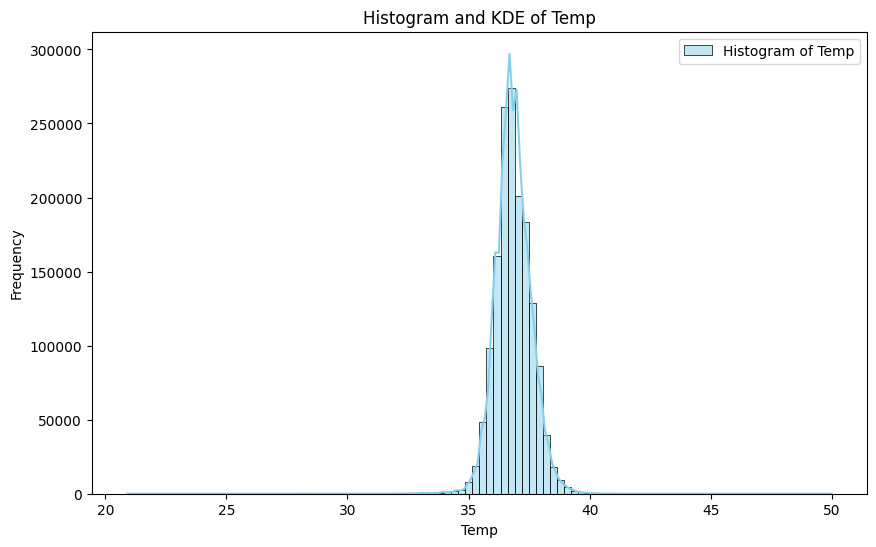

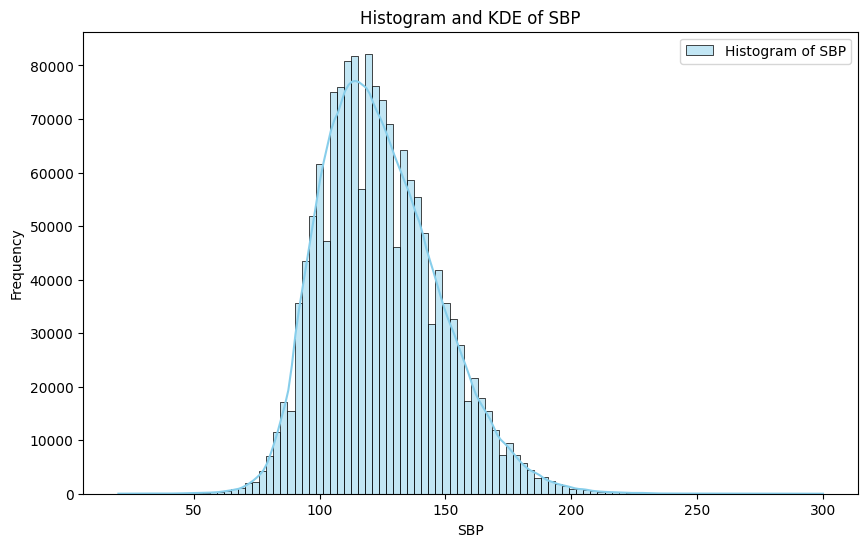

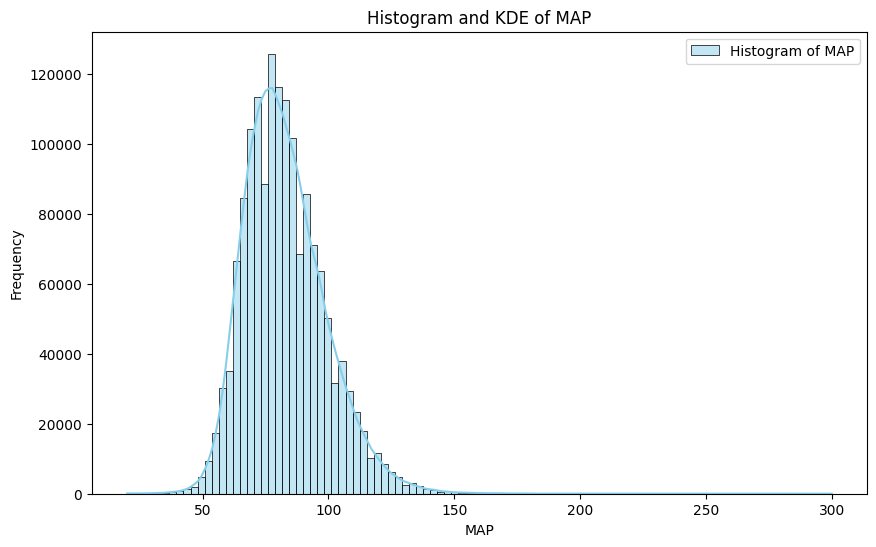

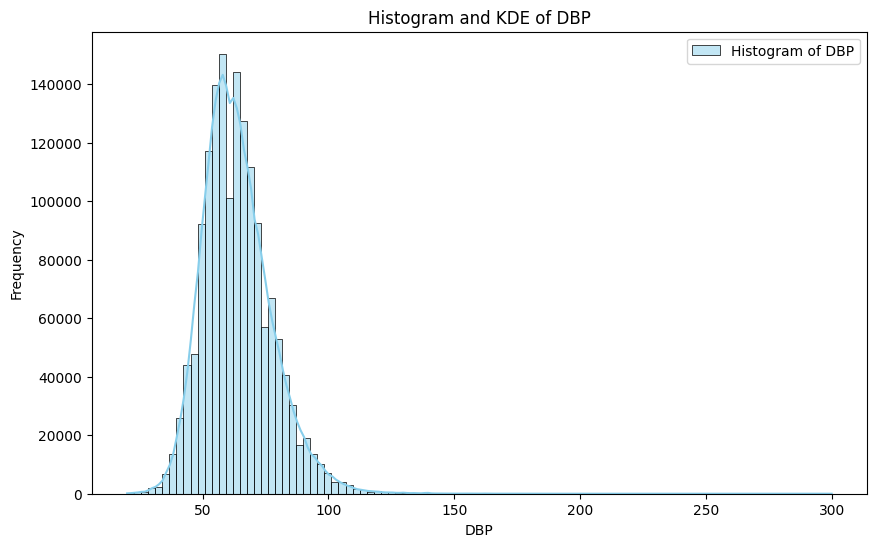

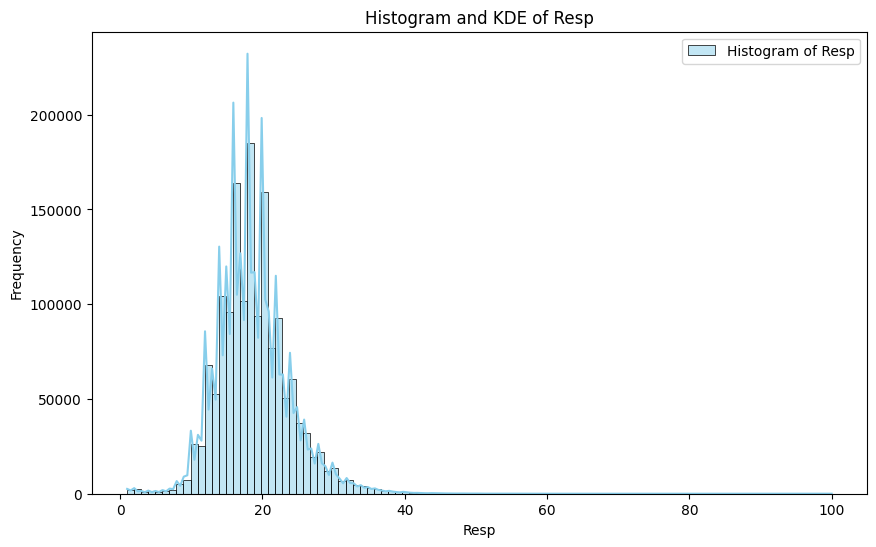

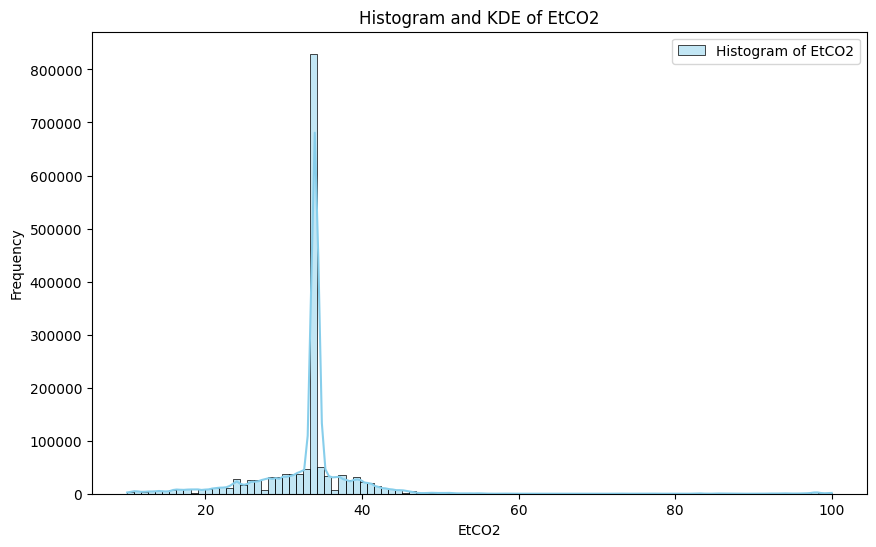

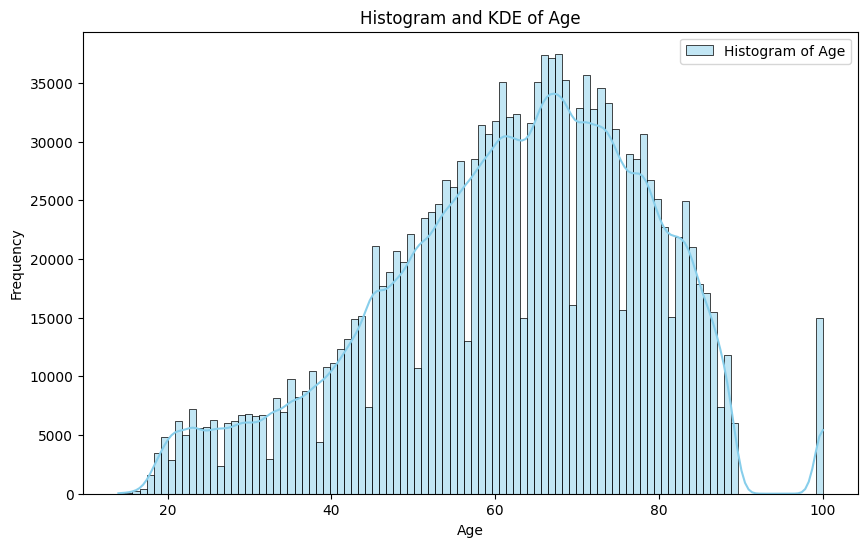

In [17]:
# List of columns to plot
columns_to_scale = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'Age']

# Plot histograms with KDE for each variable
for column in columns_to_scale:
    plt.figure(figsize=(10, 6))

    # Create histogram with KDE for the variable
    sns.histplot(df_encoded[column], kde=True, bins=100, color='skyblue', label=f'Histogram of {column}')

    # Adding labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram and KDE of {column}')
    plt.legend()
    plt.show()

# After checking the histograms we can see that:

-'HR' has normal distribution

-'O2Sat' is not normal and is squeeed to the right

-'Temp' is normal

-'SBP' is normal

-'MAP' is normal

-'DBP' is normal

-'Resp' is normal

-'EtCO2' is weird

-'Age' is normal squeeded to the right

In [18]:
df_encoded.head(50)

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
0,0,65.0,100.0,35.78,129.0,72.00,69.0,16.5,34.0,68.54,0,17072,0
1,1,65.0,100.0,35.78,129.0,72.00,69.0,16.5,34.0,68.54,0,17072,0
2,2,78.0,100.0,35.78,129.0,42.50,69.0,17.0,34.0,68.54,0,17072,0
3,3,73.0,100.0,35.78,129.0,74.00,69.0,17.0,34.0,68.54,0,17072,0
4,4,70.0,100.0,35.78,129.0,74.00,69.0,14.0,34.0,68.54,0,17072,0
5,5,62.0,100.0,35.78,124.0,85.00,61.0,14.0,34.0,68.54,0,17072,0
6,6,61.0,100.0,35.78,101.0,75.00,58.0,14.0,34.0,68.54,0,17072,0
7,7,68.0,100.0,35.78,142.0,93.50,78.0,16.0,34.0,68.54,0,17072,0
8,8,71.0,100.0,36.39,121.0,74.00,91.0,14.0,34.0,68.54,0,17072,0
9,9,69.0,100.0,36.39,120.0,79.00,98.0,14.0,34.0,68.54,0,17072,0


In [19]:
# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMaxScaler to the O2Sat column
df_encoded['O2Sat'] = min_max_scaler.fit_transform(df_encoded[['O2Sat']])

# Apply StandardScaler to the rest of the columns
columns_to_standardize = [col for col in columns_to_scale if col != 'O2Sat']
df_encoded[columns_to_standardize] = standard_scaler.fit_transform(df_encoded[columns_to_standardize])

In [20]:
df_encoded.tail(50)

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
1552160,11,-1.148063,1.00000,-1.155238,0.303339,-0.717823,-0.996611,0.262795,1.147505,0.182503,0,105149,0
1552161,12,-1.148063,1.00000,-1.155238,0.303339,-0.717823,-0.996611,0.262795,1.147505,0.182503,0,105149,0
1552162,13,-1.148063,1.00000,-1.155238,0.303339,-0.717823,-0.996611,0.262795,1.147505,0.182503,0,105149,0
1552163,14,-1.148063,1.00000,-1.155238,0.303339,-0.717823,-0.996611,0.262795,1.147505,0.182503,0,105149,0
1552164,15,-1.148063,1.00000,-1.155238,0.303339,-0.717823,-0.996611,-1.291060,1.147505,0.182503,0,105149,0
1552165,16,-1.148063,1.00000,-1.155238,0.303339,-0.717823,-0.996611,-1.291060,1.147505,0.182503,0,105149,0
1552166,17,-1.148063,1.00000,-1.155238,0.303339,-0.717823,-0.996611,-1.291060,1.147505,0.182503,0,105149,0
1552167,0,-1.148063,1.00000,-1.155238,0.303339,-0.717823,-0.996611,-1.291060,1.147505,0.121476,1,112699,0
1552168,1,-1.148063,1.00000,-1.155238,0.303339,-0.717823,-0.996611,-1.291060,1.147505,0.121476,1,112699,0
1552169,2,-0.371409,0.96250,-1.427106,0.002762,-0.778668,-0.924166,-1.679524,1.147505,0.121476,1,112699,0


In [21]:
(df_encoded['SepsisLabel'].value_counts()/len(df_encoded)).sort_values(ascending=False)

SepsisLabel
0    0.982015
1    0.017985
Name: count, dtype: float64

In [22]:
sepsis_patients_ids = list(set(df_encoded.loc[df_encoded['SepsisLabel'] == 1, 'Patient_ID'].tolist()))


In [23]:
# Get unique Patient_IDs from df_encoded
all_patient_ids = set(df_encoded['Patient_ID'])
# Find Patient_IDs not in sepsis_patients_ids
no_sepsis_patients_ids = list(all_patient_ids - set(sepsis_patients_ids))

In [27]:
import random
non_sepsis_selected_patients_ids = random.sample(no_sepsis_patients_ids, 4000)

In [30]:
non_sepsis_selected_df = df_encoded.loc[df_encoded['Patient_ID'].isin(non_sepsis_selected_patients_ids)]
sepsis_selected_df = df_encoded.loc[df_encoded['Patient_ID'].isin(sepsis_patients_ids)]

In [31]:
final_df = pd.concat([non_sepsis_selected_df,sepsis_selected_df])
final_df.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
295,0,-0.946708,0.9250,-1.005710,1.634469,0.884215,-0.634383,-1.291060,0.096771,1.226673,0,5419,0
296,1,-0.889178,0.9250,-1.005710,2.665021,1.776806,-0.634383,-1.291060,0.096771,1.226673,0,5419,0
297,2,-0.831649,0.6500,-1.005710,1.290952,0.640837,-0.634383,0.262795,0.096771,1.226673,0,5419,0
298,3,-0.543999,0.9125,0.652688,1.333891,0.742447,-0.634383,-0.125669,0.096771,1.226673,0,5419,0
299,4,-0.716589,0.9375,0.652688,1.677409,0.783213,-0.634383,0.457027,0.096771,1.226673,0,5419,0


In [32]:
patient_ids = final_df['Patient_ID'].unique()
patient_ids_shuffled = np.random.shuffle(patient_ids)


In [33]:
# Split the data into training and testing sets, we have 5545 patients for train and 1386 for test so a total of 1386 + 5545 = 6931 patients
split_point = int(0.8 * len(patient_ids))  # 80% train, 20% test
split_point

5545

In [34]:
train_ids = patient_ids[:split_point]
test_ids = patient_ids[split_point:]

In [35]:
train_df = final_df.loc[final_df['Patient_ID'].isin(train_ids)]
test_df = final_df.loc[final_df['Patient_ID'].isin(test_ids)]

In [36]:
train_df

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
295,0,-0.946708,0.92500,-1.005710,1.634469,0.884215,-0.634383,-1.291060,0.096771,1.226673,0,5419,0
296,1,-0.889178,0.92500,-1.005710,2.665021,1.776806,-0.634383,-1.291060,0.096771,1.226673,0,5419,0
297,2,-0.831649,0.65000,-1.005710,1.290952,0.640837,-0.634383,0.262795,0.096771,1.226673,0,5419,0
298,3,-0.543999,0.91250,0.652688,1.333891,0.742447,-0.634383,-0.125669,0.096771,1.226673,0,5419,0
299,4,-0.716589,0.93750,0.652688,1.677409,0.783213,-0.634383,0.457027,0.096771,1.226673,0,5419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551371,5,-1.723363,0.98125,0.475973,-0.834562,-0.535289,-0.634383,0.262795,-0.231583,0.243530,1,119010,1
1551372,6,-1.752128,0.95000,-0.611501,-0.512514,-0.535289,-0.851720,0.262795,0.490796,0.243530,1,119010,1
1551373,7,-0.975473,0.95625,-0.611501,-0.254876,-0.352756,-0.634383,0.262795,0.622138,0.243530,1,119010,1
1551374,8,-1.004238,0.95000,-0.611501,-0.362226,-0.413600,-0.598160,0.262795,0.819151,0.243530,1,119010,1


In [37]:
test_df

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
1139,0,-0.313879,1.00000,0.435193,-1.543067,-1.589726,0.198742,0.068563,0.096771,-0.586436,0,4881,0
1140,1,-0.313879,1.00000,0.435193,-1.543067,-1.589726,0.198742,0.068563,0.096771,-0.586436,0,4881,0
1141,2,-0.457704,1.00000,0.435193,-1.650416,-1.397457,0.198742,0.457027,0.096771,-0.586436,0,4881,0
1142,3,-0.428939,0.97500,0.435193,-1.457187,-1.265425,0.198742,0.262795,0.096771,-0.586436,0,4881,0
1143,4,-0.774119,0.97500,0.435193,-1.586006,-1.245346,0.198742,0.068563,0.096771,-0.586436,0,4881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550594,9,2.620148,1.00000,-0.203698,-0.684273,-0.048533,0.307410,-0.125669,-0.034570,-0.488793,0,102971,1
1550595,10,2.390028,0.98750,-0.203698,-1.113670,-0.535289,-0.127264,-0.125669,0.228113,-0.488793,0,102971,1
1550596,11,2.620148,0.98750,-0.203698,-0.941911,-0.413600,0.017628,-0.125669,0.490796,-0.488793,0,102971,1
1550597,12,2.505088,0.98125,-0.815402,-1.457187,-0.778668,-0.417046,-0.125669,0.622138,-0.488793,0,102971,1


In [38]:
X_train = train_df.drop('SepsisLabel',axis=1)
y_train = train_df['SepsisLabel']

In [39]:
X_test = test_df.drop('SepsisLabel',axis=1)
y_test = test_df['SepsisLabel']


In [40]:
!pip install darts --quiet

import darts
print(f"Darts version: {darts.__version__}")

^C
ERROR: Operation cancelled by user


ModuleNotFoundError: No module named 'darts'